In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [6]:
set_files = glob('./data/EEG_datasets/*.set')
print("Total set files: ", len(set_files))

subj_fileids = []
eeg_data_matrix = []
eeg_raw_to_interpolated = []

for subj_file in set_files:
    raw_eeg = mne.io.read_raw_eeglab(subj_file, verbose=False)
    eeg_data = raw_eeg.copy().pick_types(meg=False, eeg=True, exclude=[]).load_data()
    eeg_data_interp = eeg_data.copy().interpolate_bads(reset_bads=False)
    # eeg_data = raw_eeg.get_data(reject_by_annotation='omit')
    
    subj_fileids.append(subj_file)
    eeg_data_matrix.append(eeg_data_interp)

Total set files:  176


/tmp/ipykernel_1590393/1420596258.py:9: RuntimeWarning: Unknown types found, setting as type EEG:
eeg-ref: ['M1', 'M2']
extra: ['EXG1', 'EXG2', 'EXG3', 'EXG4', 'Erg1', 'Erg2', 'GSR1', 'GSR2', 'Plet', 'Resp', 'Temp']
  raw_eeg = mne.io.read_raw_eeglab(subj_file, verbose=False)
/tmp/ipykernel_1590393/1420596258.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_eeg = mne.io.read_raw_eeglab(subj_file, verbose=False)
/tmp/ipykernel_1590393/1420596258.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  eeg_data_interp = eeg_data.copy().interpolate_bads(reset_bads=False)
/tmp/ipykernel_1590393/1420596258.py:9: RuntimeWarning: Unknown types found, setting as type EEG:
eeg-ref: ['M1', 'M2']
extra: ['EXG1', 'EXG2', 'EXG3', 'EXG4', 'Erg1', 'Erg2', 'GSR1', 'GSR2', 'Plet', 'Resp', 'Temp']
  raw_eeg = mne.io.read_raw_eeglab(subj_file, verbose=False)
/tmp/ipykernel_1590393/

In [7]:
len(subj_fileids), len(eeg_data_matrix)

(176, 176)

In [ ]:
type(eeg_data_matrix[0]), dir(eeg_data_matrix[0])

In [9]:
eeg_data_matrix_datadata = [eeg_chs.get_data() for eeg_chs in eeg_data_matrix]

<RawEEGLAB | VIP12_19022011_think2.fdt, 76 x 154240 (602.5 s), ~89.5 MB, data loaded>

256 cycles per second. This means that if the duration was 10 mins, then there will be t=(10 * 60 seconds), and hence, total 256 * t cycles (or data points sampled) in total.

Plot of eeg data channels with interpolation:


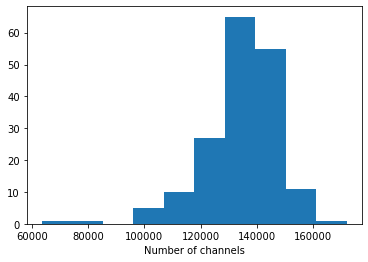

In [8]:
print("Plot of eeg data channels with interpolation:")
b, h, p = plt.hist([len(x) for x in eeg_data_matrix])
plt.xlabel('Number of channels')
plt.show()

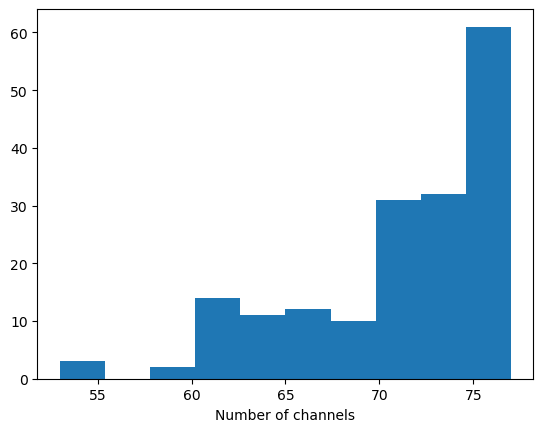

In [43]:
print("Plot of eeg data channels without interpolation:")
b, h, p = plt.hist([len(x) for x in eeg_data_matrix])
plt.xlabel('Number of channels')
plt.show()

In [39]:
eeg_data_matrix[0].shape

(76, 154240)

In [37]:
[len(x) for x in eeg_data_matrix]

[76,
 74,
 71,
 66,
 76,
 76,
 69,
 71,
 73,
 69,
 75,
 62,
 62,
 73,
 75,
 71,
 77,
 72,
 71,
 70,
 75,
 69,
 77,
 75,
 76,
 73,
 77,
 72,
 66,
 67,
 69,
 59,
 74,
 72,
 76,
 53,
 77,
 74,
 64,
 74,
 71,
 76,
 73,
 69,
 62,
 72,
 67,
 73,
 74,
 53,
 71,
 73,
 70,
 70,
 73,
 75,
 75,
 76,
 73,
 76,
 64,
 73,
 76,
 70,
 72,
 74,
 76,
 66,
 76,
 61,
 65,
 76,
 74,
 73,
 72,
 76,
 72,
 64,
 74,
 74,
 75,
 75,
 76,
 69,
 75,
 72,
 61,
 64,
 75,
 62,
 66,
 73,
 76,
 77,
 76,
 61,
 76,
 73,
 72,
 71,
 75,
 69,
 72,
 67,
 76,
 75,
 77,
 64,
 61,
 64,
 73,
 64,
 73,
 76,
 65,
 75,
 59,
 69,
 76,
 64,
 76,
 70,
 64,
 72,
 64,
 69,
 71,
 74,
 74,
 71,
 62,
 62,
 67,
 76,
 75,
 75,
 75,
 75,
 72,
 73,
 75,
 66,
 71,
 76,
 76,
 76,
 76,
 61,
 77,
 64,
 66,
 69,
 53,
 73,
 76,
 71,
 70,
 75,
 77,
 76,
 62,
 76,
 62,
 73,
 77,
 73,
 71,
 73,
 70,
 62,
 75,
 76,
 76,
 76,
 73,
 74]

In [27]:
mne.io.read_raw_eeglab??

In [2]:
mne.io.read_raw_eeglab("data/EEG_datasets/CTR11_11012010_breath2.set")

Reading /home/singh_shruti/workspace/rep_learning/meditation-eeg-representations/data/EEG_datasets/CTR11_11012010_breath2.fdt


<ipython-input-2-6ab4ae1b0fd0>:1: RuntimeWarning: Unknown types found, setting as type EEG:
eeg-ref: ['M1', 'M2']
extra: ['EXG1', 'EXG2', 'EXG3', 'EXG4']
  mne.io.read_raw_eeglab("data/EEG_datasets/CTR11_11012010_breath2.set")
<ipython-input-2-6ab4ae1b0fd0>:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne.io.read_raw_eeglab("data/EEG_datasets/CTR11_11012010_breath2.set")


<RawEEGLAB | CTR11_11012010_breath2.fdt, 67 x 120832 (472.0 s), ~92 kB, data not loaded>

In [8]:
raw_eeg = mne.io.read_raw_eeglab("data/EEG_datasets/CTR11_11012010_breath2.set")

Reading /home/singh_shruti/workspace/rep_learning/meditation-eeg-representations/data/EEG_datasets/CTR11_11012010_breath2.fdt


<ipython-input-8-0c5f87521317>:1: RuntimeWarning: Unknown types found, setting as type EEG:
eeg-ref: ['M1', 'M2']
extra: ['EXG1', 'EXG2', 'EXG3', 'EXG4']
  raw_eeg = mne.io.read_raw_eeglab("data/EEG_datasets/CTR11_11012010_breath2.set")
<ipython-input-8-0c5f87521317>:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_eeg = mne.io.read_raw_eeglab("data/EEG_datasets/CTR11_11012010_breath2.set")


In [9]:
dir(raw_eeg)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_dtype',
 '_dtype_',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_getitem',
 '_handle_tmin_tmax',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_pick_projs',
 '_preload_data',
 '_projector',
 '_projectors',
 '_raw_extras',
 '_raw_lengths',
 '_read_comp_grade',
 '_read_picks',
 '_read_segment',
 '_read_segment_file',
 '_reconstruct_proj',
 '_r

In [10]:
raw_eeg.describe()

<RawEEGLAB | CTR11_11012010_breath2.fdt, 67 x 120832 (472.0 s), ~92 kB, data not loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fp1   EEG   µV       -58.26      -7.76      -1.71       4.48      62.00
 1  AF7   EEG   µV       -55.26      -5.69       0.46       6.75      55.01
 2  AF3   EEG   µV       -57.60      -6.67      -0.08       6.55      54.30
 3  F1    EEG   µV       -69.32      -8.91      -1.40       6.15      59.90
 4  F3    EEG   µV       -64.31      -8.19      -1.04       6.19      50.26
 5  F5    EEG   µV       -68.54      -6.90      -0.36       6.20      50.51
 6  F7    EEG   µV       -66.26      -7.27      -1.25       4.83      66.96
 7  FT7   EEG   µV       -50.09      -4.41       0.94       6.30      43.31
 8  FC5   EEG   µV       -56.49      -5.17       0.77       6.74      46.50
 9  FC3   EEG   µV       -59.75      -7.91      -0.95       6.04      49.89
10  FC1   EEG   µV       -64.22      -9.17      -1.55       6.08      61.46

In [25]:
raw_eeg.get_data??

In [15]:
eeg_data = raw_eeg.get_data()
## Note: Need to remove bad channels - https://mne.tools/stable/auto_tutorials/preprocessing/15_handling_bad_channels.html

In [13]:
type(eeg_data), dir(eeg_data)

(numpy.ndarray,
 ['T',
  '__abs__',
  '__add__',
  '__and__',
  '__array__',
  '__array_finalize__',
  '__array_function__',
  '__array_interface__',
  '__array_prepare__',
  '__array_priority__',
  '__array_struct__',
  '__array_ufunc__',
  '__array_wrap__',
  '__bool__',
  '__class__',
  '__complex__',
  '__contains__',
  '__copy__',
  '__deepcopy__',
  '__delattr__',
  '__delitem__',
  '__dir__',
  '__divmod__',
  '__doc__',
  '__eq__',
  '__float__',
  '__floordiv__',
  '__format__',
  '__ge__',
  '__getattribute__',
  '__getitem__',
  '__gt__',
  '__hash__',
  '__iadd__',
  '__iand__',
  '__ifloordiv__',
  '__ilshift__',
  '__imatmul__',
  '__imod__',
  '__imul__',
  '__index__',
  '__init__',
  '__init_subclass__',
  '__int__',
  '__invert__',
  '__ior__',
  '__ipow__',
  '__irshift__',
  '__isub__',
  '__iter__',
  '__itruediv__',
  '__ixor__',
  '__le__',
  '__len__',
  '__lshift__',
  '__lt__',
  '__matmul__',
  '__mod__',
  '__mul__',
  '__ne__',
  '__neg__',
  '__new__',
  '

In [14]:
eeg_data.shape

(67, 120832)

In [21]:
np.median(eeg_data[0])

-1.7055140733718872e-06

In [22]:
np.min(eeg_data[0])

-5.825538253784179e-05